## WINE QUALITY PREDICTION
    
    @PrachiParmar

   ### Problem Statement:
   
       The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

    This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
    
   ### ATTRIBUTES:
       
       - Input variables (based on physicochemical tests):
            1 - fixed acidity
            2 - volatile acidity
            3 - citric acid
            4 - residual sugar
            5 - chlorides
            6 - free sulfur dioxide
            7 - total sulfur dioxide
            8 - density
            9 - pH
            10 - sulphates
            11 - alcohol
            
       - Output variable (based on sensory data):
            12 - quality (score between 0 and 10)
            
    What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
    This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

    You need to build a classification model. 

  ### Inspiration

        Use machine learning to determine which physiochemical properties make a wine 'good'!
        
 #### Conclusion:
     
     - Predicting whether a Wine is Good(7,7+) - Target value 1  ||  BAD (below 7 score) -Target Value 0
     - Also, Predicting Wine Quality Score (1-10)
     - Which Attributes Makes a Wine Best in Quality.



### STEP 1: DATA PREPARATION

    - Importing imports
    - loading Data
    - Checking Data Types of variables
    - checknig for null values and size of data

In [522]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [523]:
data = pd.read_csv('winedata.csv')

In [524]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [525]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


      No NUll Data

In [526]:
(data.isnull()).sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [527]:
data.quality.value_counts().sort_values

<bound method Series.sort_values of 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64>

In [528]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### STEP 2: EDA

        

<AxesSubplot:xlabel='quality', ylabel='count'>

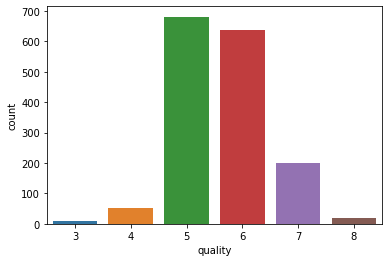

In [529]:
sb.countplot(data.quality)

**Quality 5,6 are the most in number ( Moderate Quality )**

In [530]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [531]:
quality_table = {'quality': ['poor','Good'],
                'Percentage of Data': [round((681+638+53+10)/1599*100),round((199+18)/1599*100)]}

In [532]:
quality_cross_tab = pd.DataFrame(quality_table)

In [533]:
quality_cross_tab

,quality,Percentage of Data
0,poor,86
1,Good,14


<AxesSubplot:title={'center':'Quality of Wine Poor 84% (Below 7) Vs Good 14% (Quality 7+)'}, xlabel='quality', ylabel='Percentage of Data'>

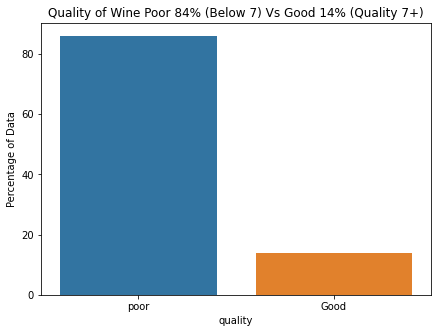

In [534]:
plt.figure(figsize=[7,5])
plt.title('Quality of Wine Poor 84% (Below 7) Vs Good 14% (Quality 7+)')
sb.barplot(quality_cross_tab['quality'],quality_cross_tab['Percentage of Data'])

Create a New Column for Quality (quality 7 and above) Good OR BAD( quality below 7)

In [535]:
data['Target Poor/Good'] = data['quality'].apply(lambda x: 1 if x>=7 else 0) # Good=1, BAD =0

In [536]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target Poor/Good
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


In [537]:
colist = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

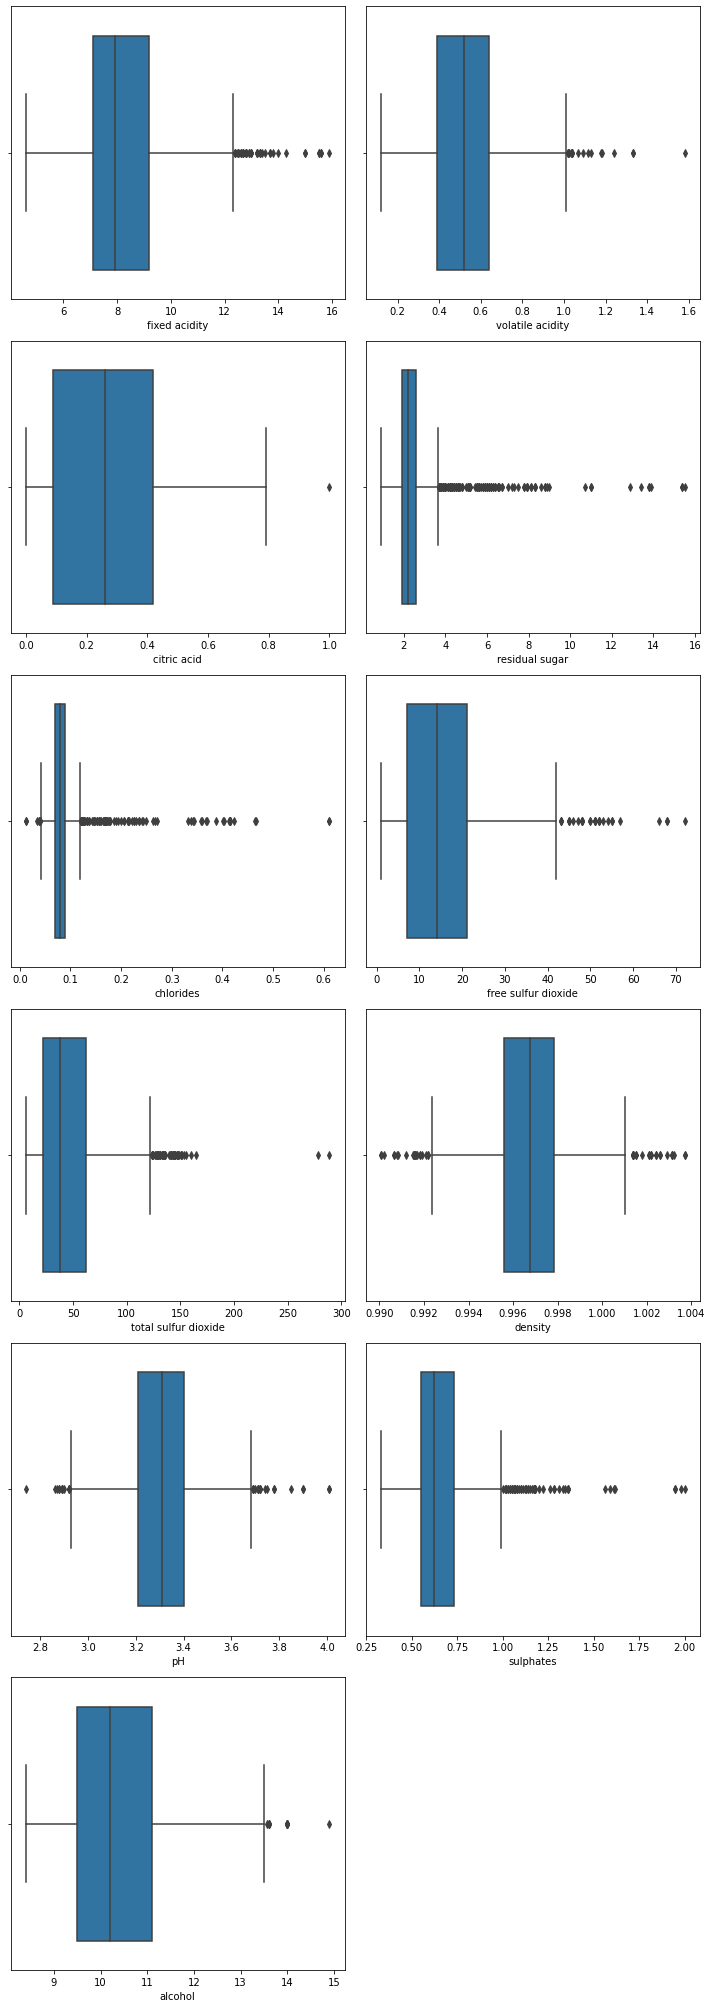

In [538]:
plt.figure(figsize=(10,28))
for i in range(0,len(colist)):
    plt.subplot(6,2,i+1)
    sb.boxplot(data[colist[i]],orient='v')
    plt.tight_layout()

**Observations**
       **notice outliers and range of the Features**
       
       
**SEE the boxplot range with Target Specific Distinction **

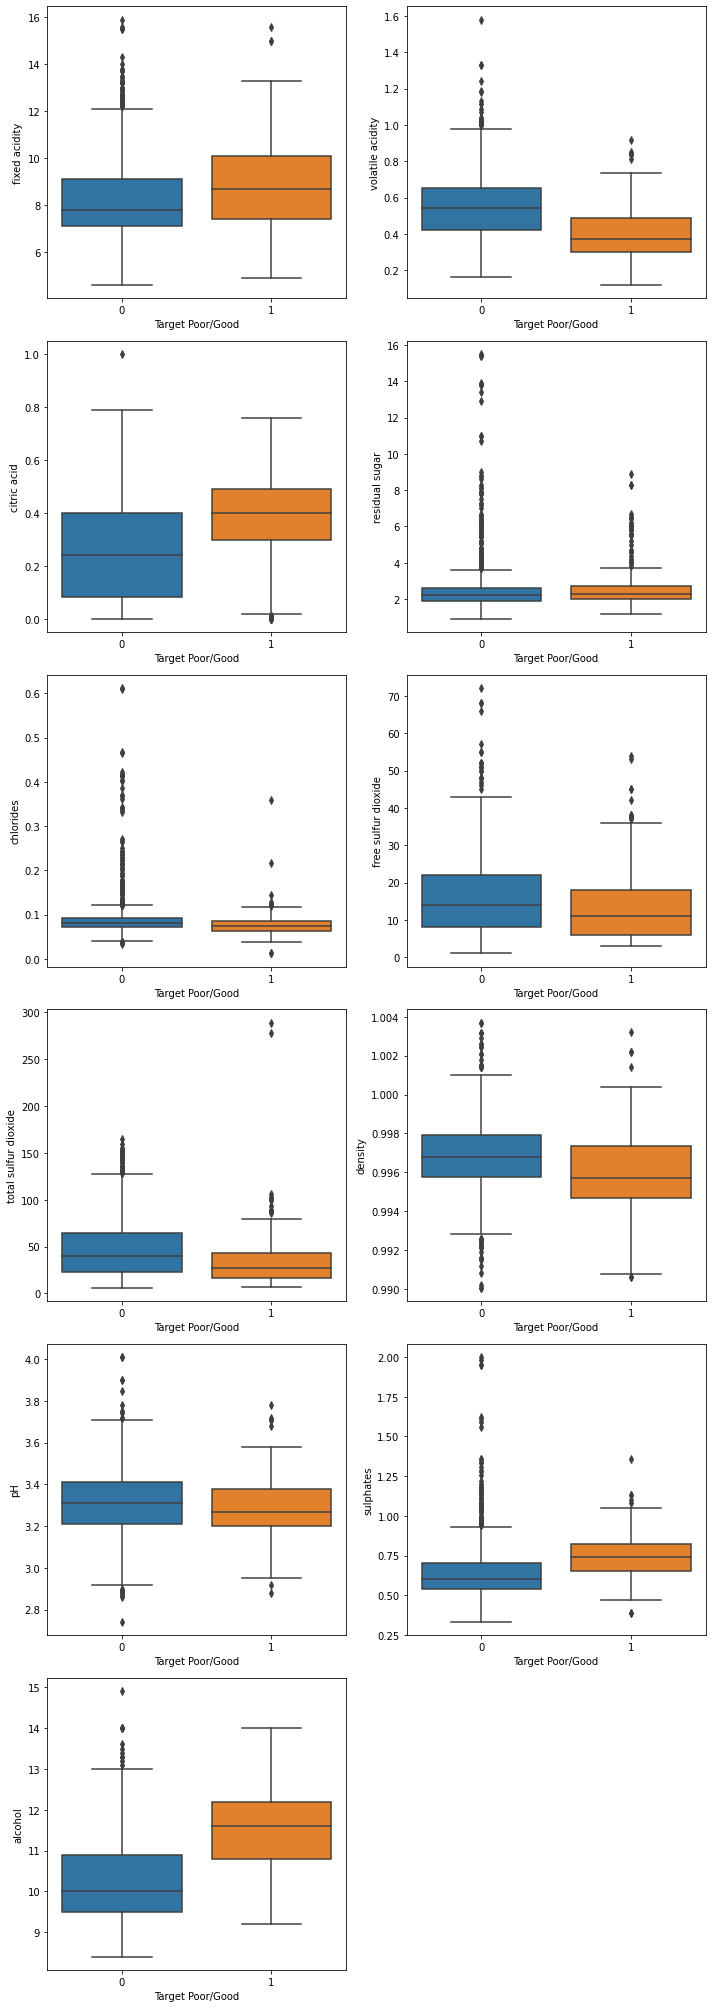

In [539]:
plt.figure(figsize=(10,28))
for i in range(0,len(colist)):
    plt.subplot(6,2,i+1)
    sb.boxplot(data['Target Poor/Good'],data[colist[i]],orient='v')
    plt.tight_layout()

#### Observations:
        - Some Features like Alcohol(Major Diff ) content,sulphates, critic acid, volatile acity,Chlorides, fixed acidity has high difference in ranges for Target Variables.
        
**WE can get more information of what makes a wine good/ good by visualizing through barplot for each features**

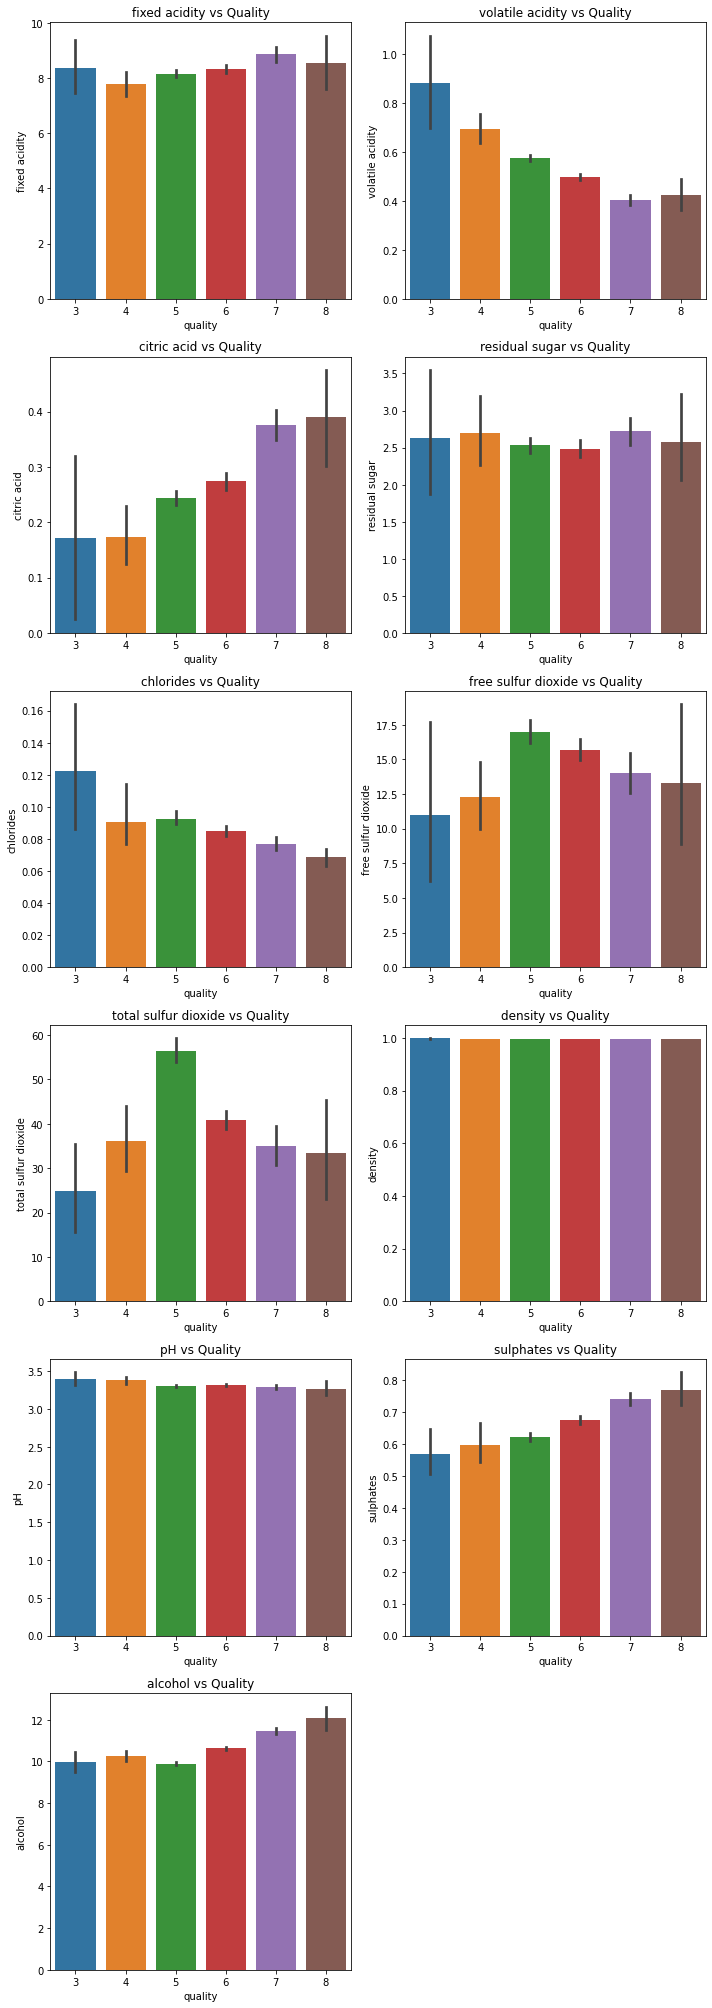

In [540]:
plt.figure(figsize=(10,28))
for i in range(0,len(colist)):
    plt.subplot(6,2,i+1)
    sb.barplot(data['quality'],data[colist[i]],orient='v')
    plt.tight_layout()
    plt.title(colist[i]+' vs Quality')

#### Observations
    - Alcohol Content of Good quality wine(7 , 7+) have high alcohol content.
    - Ph,Density,residual Sugar,Fixed Acidity have Same range for all quality of wine ( DOesnot help in Distinction of Wine)
    - Good quality wine(7 , 7+) have high suplate content(0.74 +).
    - total supher dioxide content of Quality 5 is highest and other quality wines have same range. Quality 5 come is neither bad or good. we Can say moderate Quality Wine have HIGH TOTAL SULPHUR DIOXIDE
    - Chlorides, Volatile Acidity are relatively high for poor quality wines(below 7)
    -Citric Acid is High for Good quality Wines(7,7+)
    
    
**WE GET A CLEAR VISUALIZATION ON WHAT MAKES A WINE A GOOD QUALITY , Alcohol Content, suplate content, Chlorides, Citric Acid **, Look Below for More Specific For Good/Poor Quality wines w.r.t to each Feature

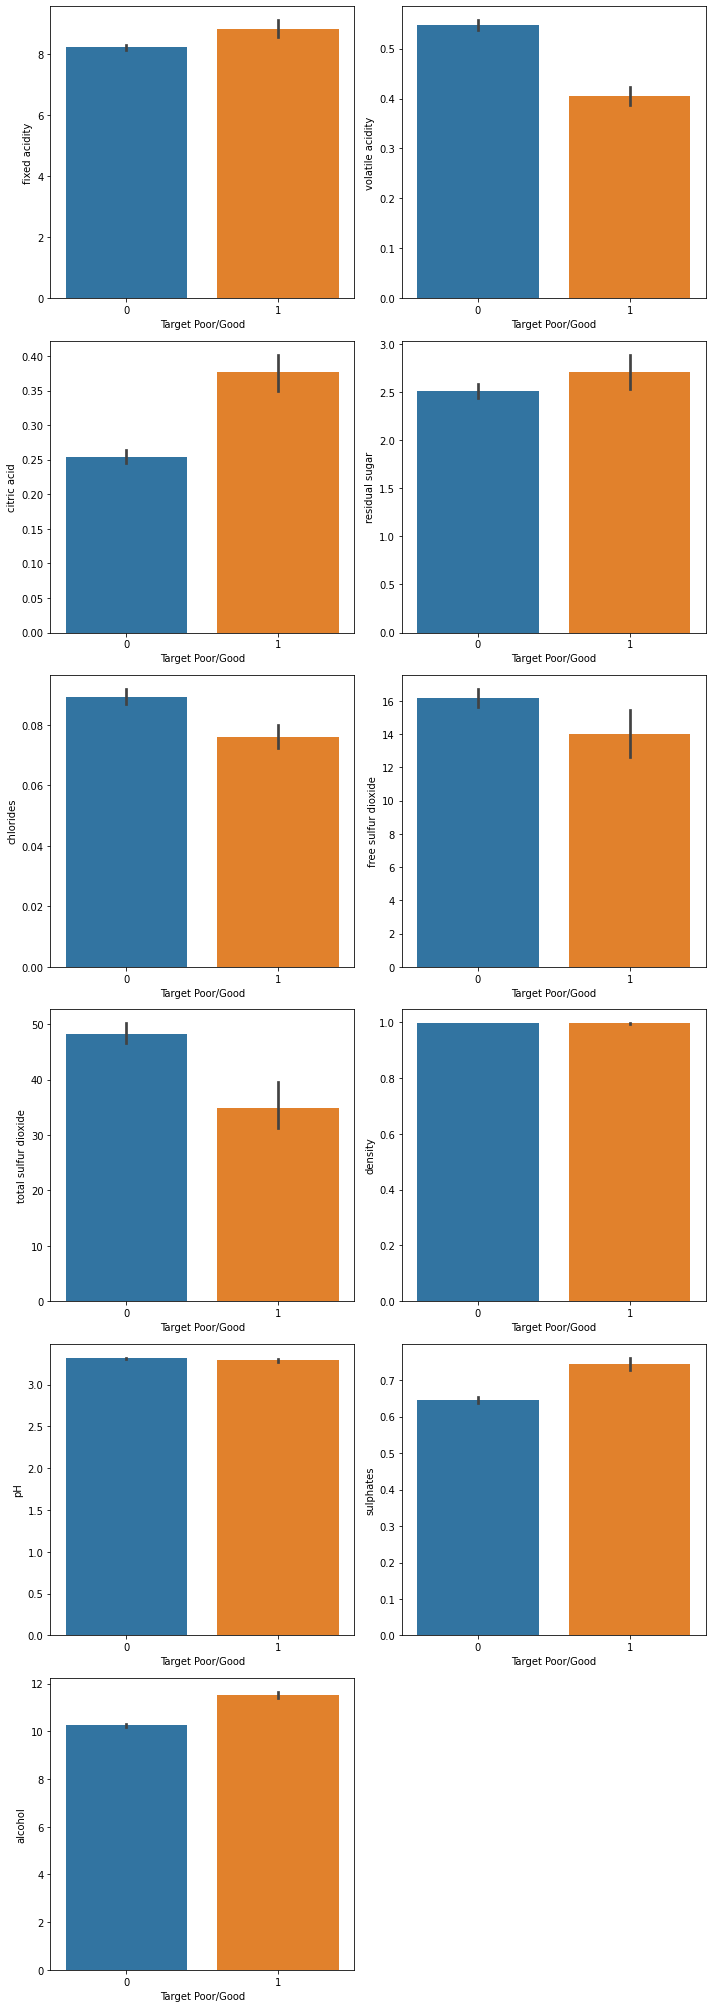

In [541]:
plt.figure(figsize=(10,28))
for i in range(0,len(colist)):
    plt.subplot(6,2,i+1)
    sb.barplot(data['Target Poor/Good'],data[colist[i]],orient='v')
    plt.tight_layout()

#### **OBservation**:
    - More Specific Visualization after grouping good Wine (7,7+) and Poor Wine Quality (below 7), we get to know qwhich features contributes least to the determination of quality of Wine.
    
    - PH, Density,Residual Sugar have the least contribution to the determination of the Qualtiy ofthe Same as they have least difference is Ranges for the Target Variable.
 

##### Lets Check the Distribution of all the features, as All features are continous variables

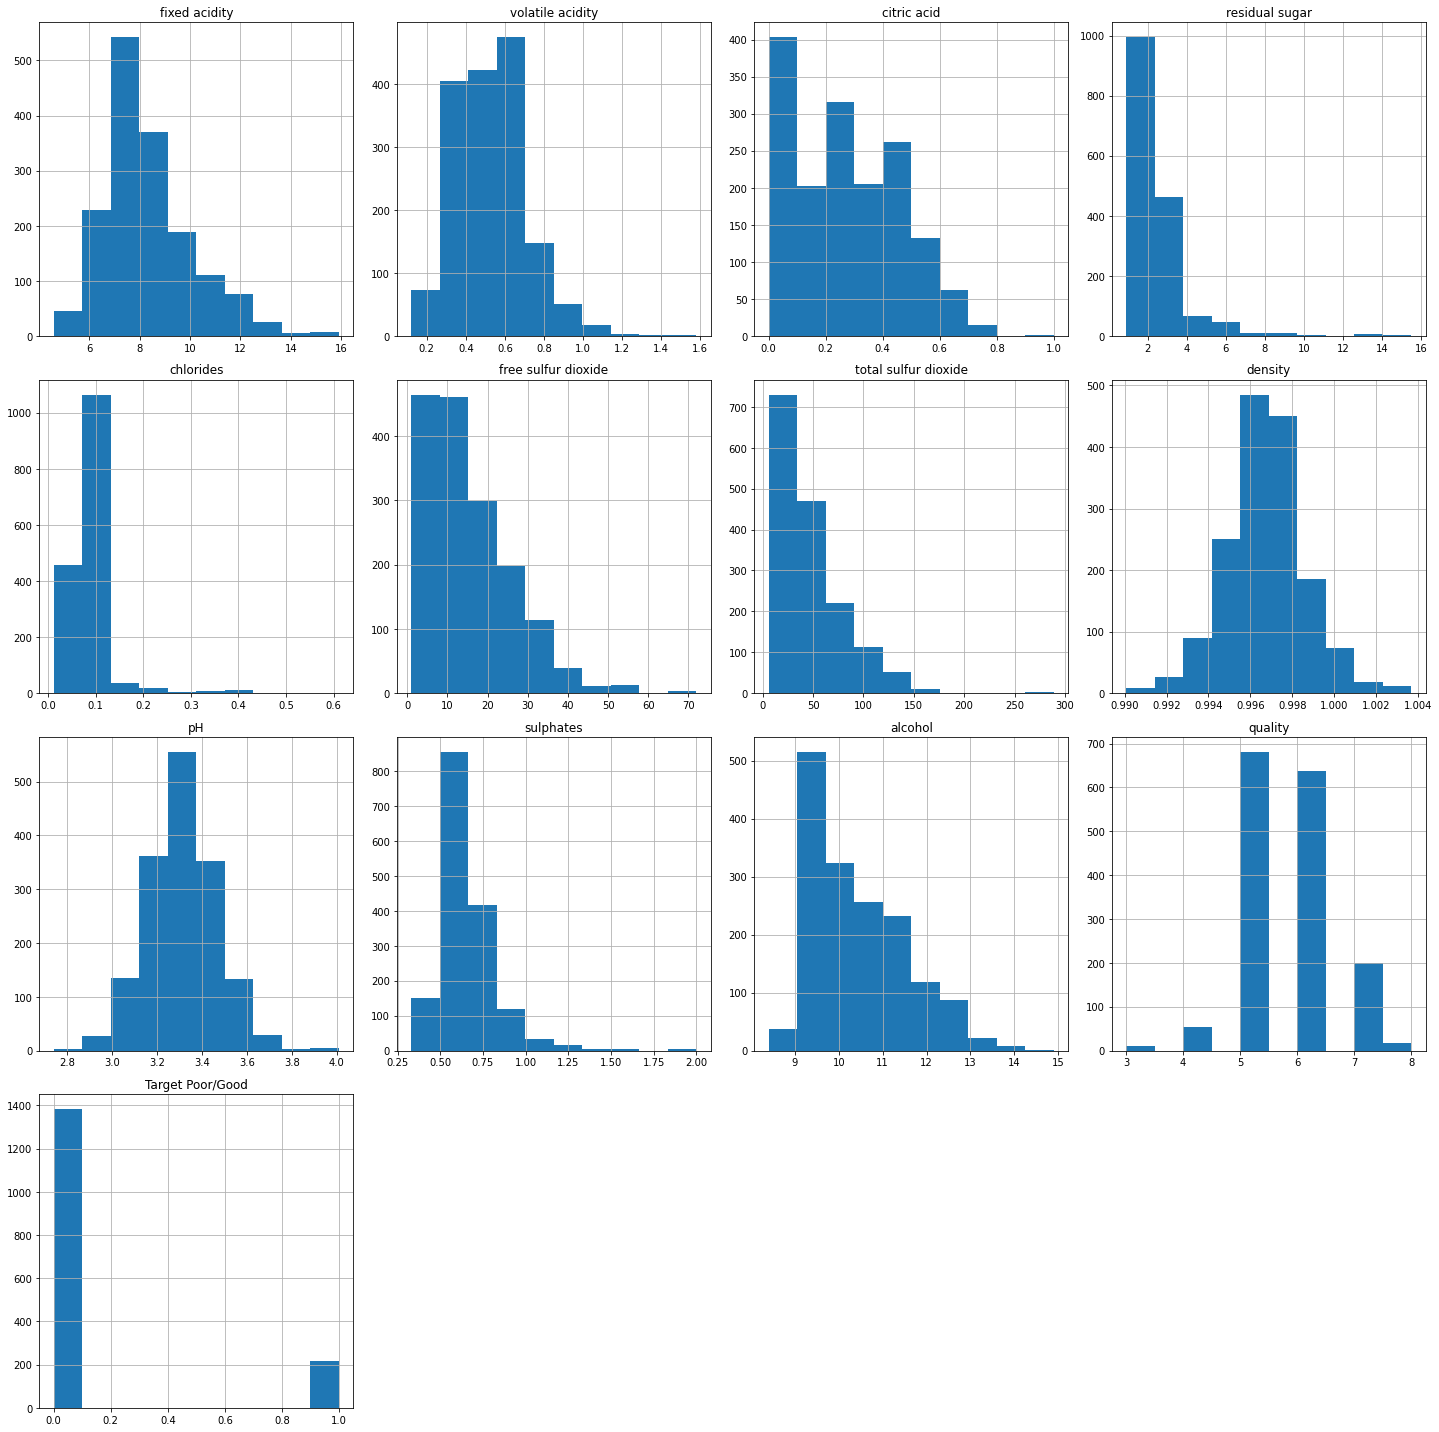

In [542]:
data.hist(figsize=[20,20])
plt.subplots_adjust(bottom=.25)
plt.tight_layout()


##### **OBservation : **
        - WE can see a little skewed distribution for Alcohol,total sulpher dioxide,chlorides,sulphates,free sulpher dioxide,critic acid, residulal sugar, volatile acitity
        
 **Lets Check the Skewness Values**, we will do the treatment for skewness after the EDA 

In [543]:
data.iloc[:,:-2].skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

        CHECKING CORELATION 

<AxesSubplot:>

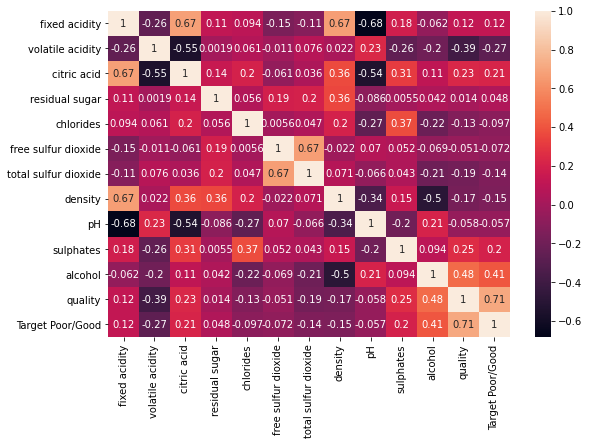

In [544]:
plt.figure(figsize=(9,6))
sb.heatmap(data.iloc[:,:].corr(),annot=True)

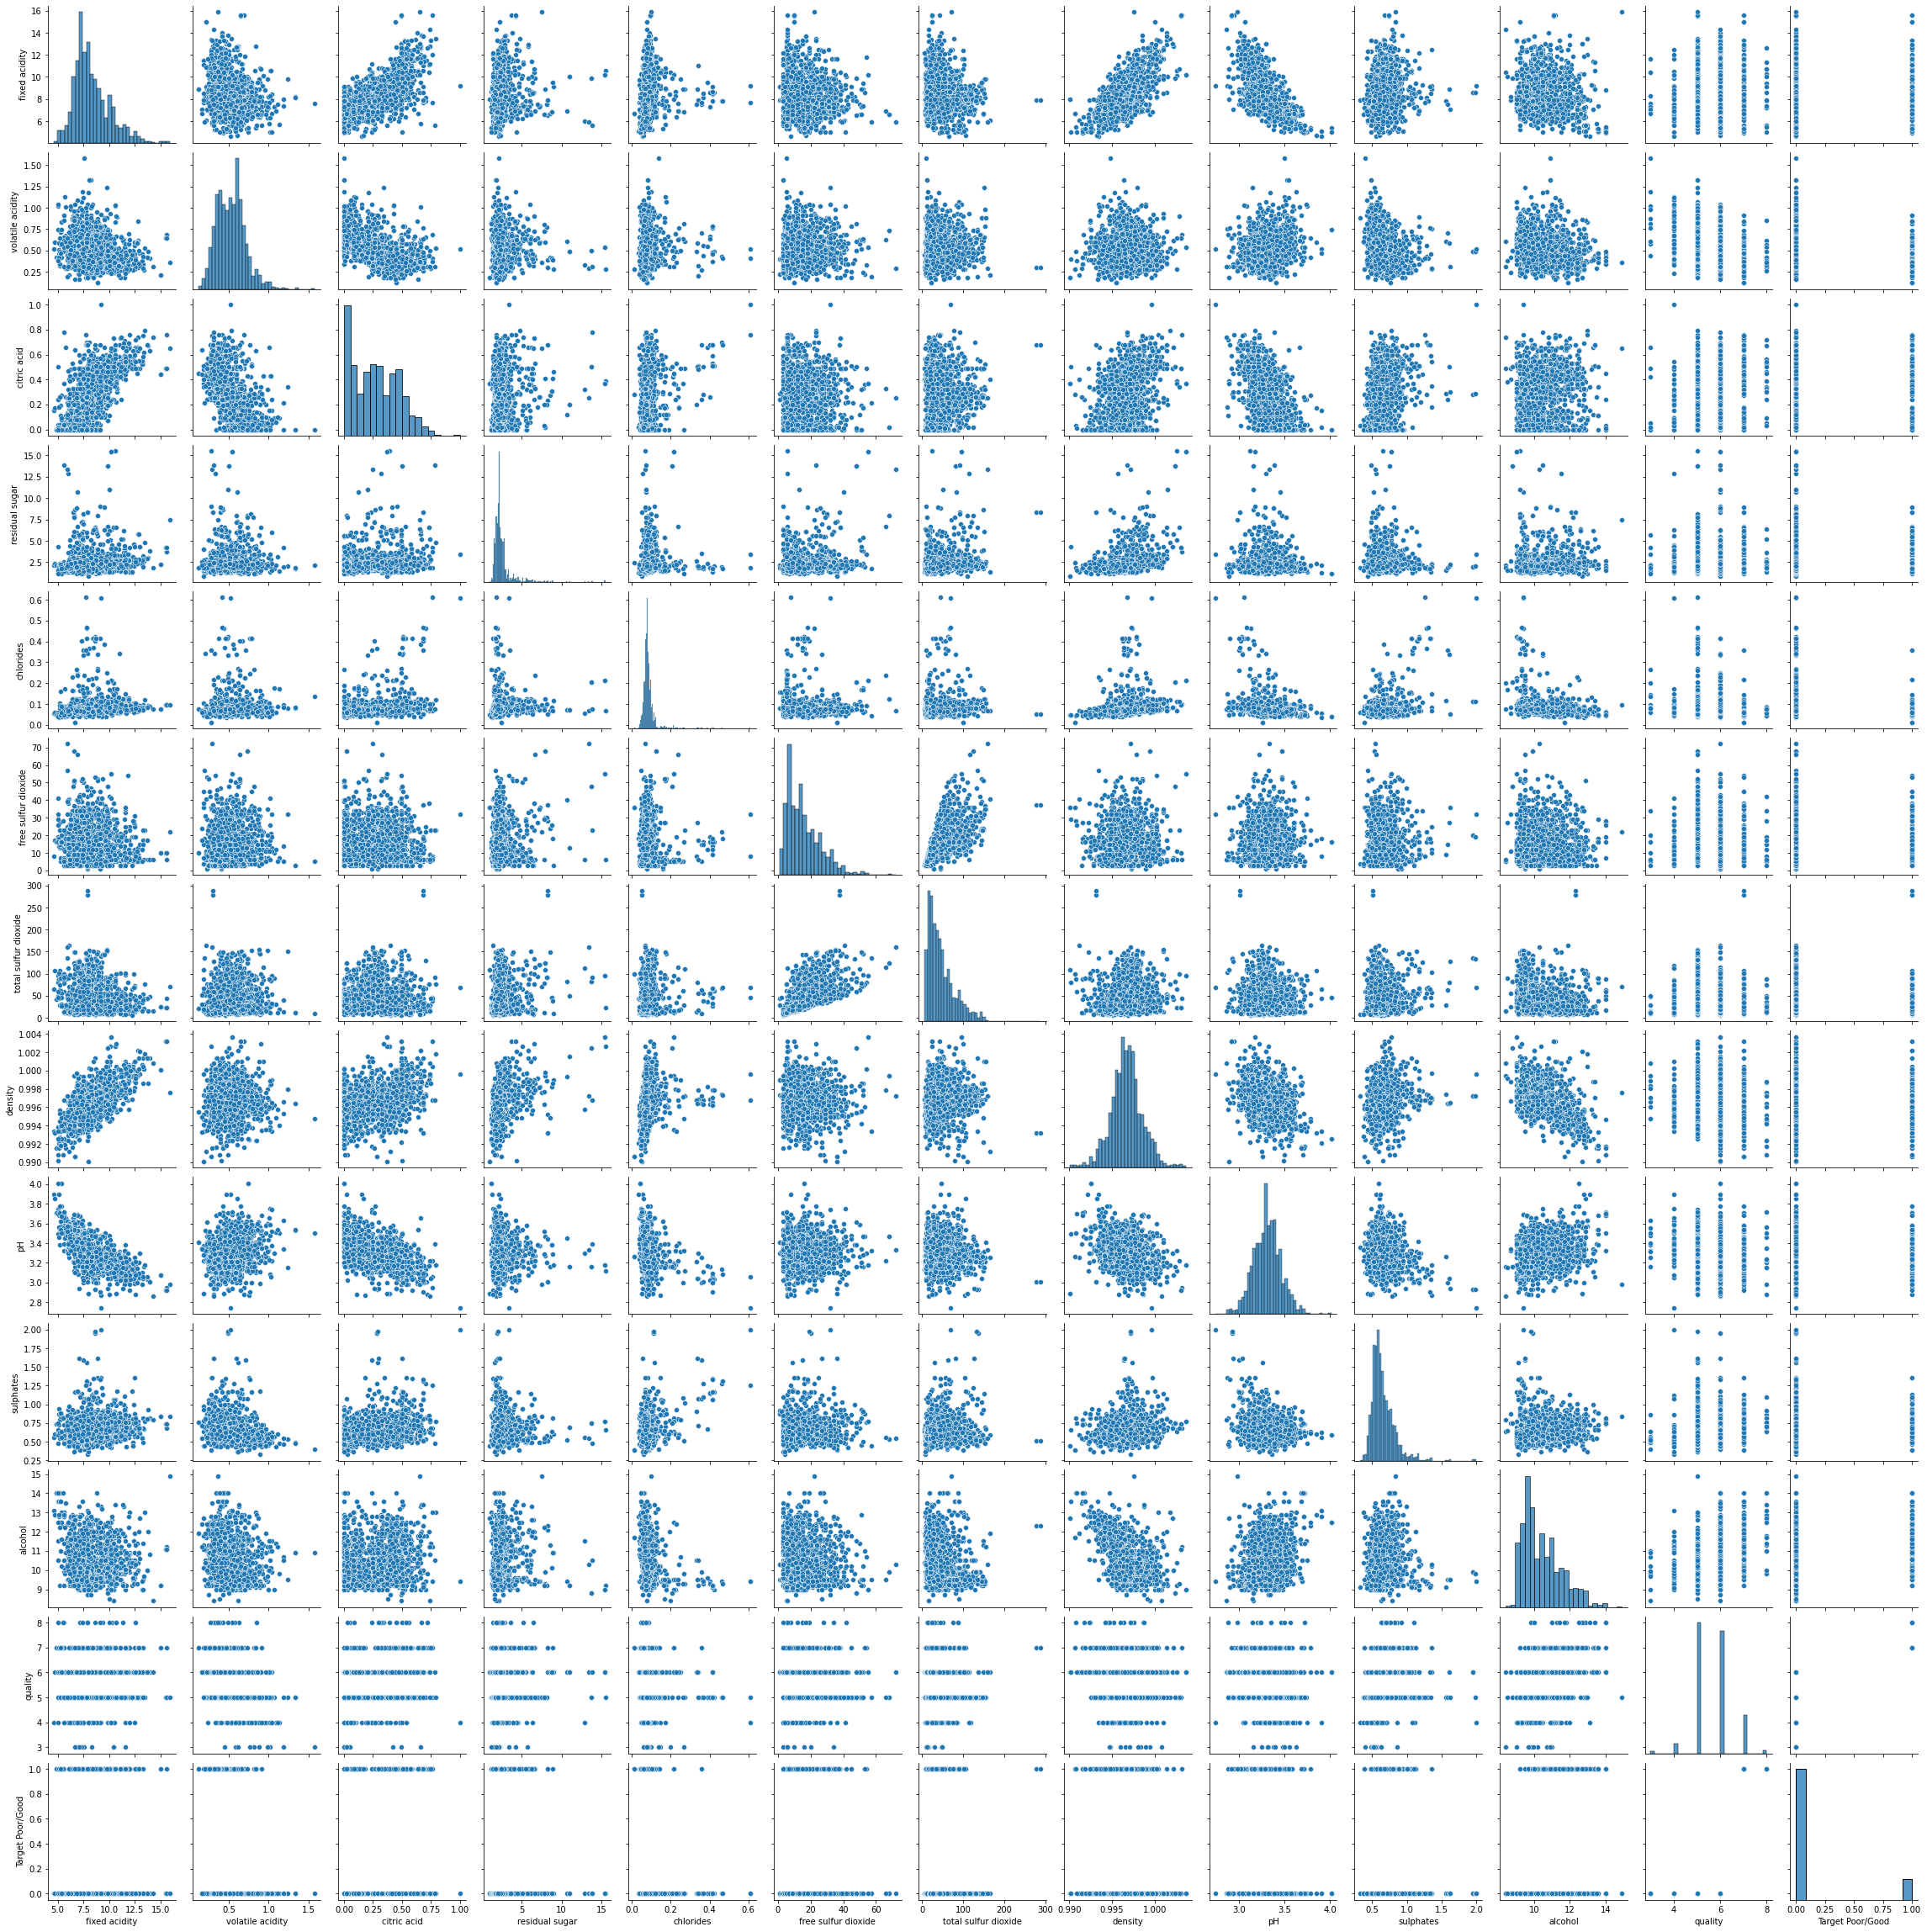

In [545]:
sb.pairplot(data)

<AxesSubplot:xlabel='density', ylabel='fixed acidity'>

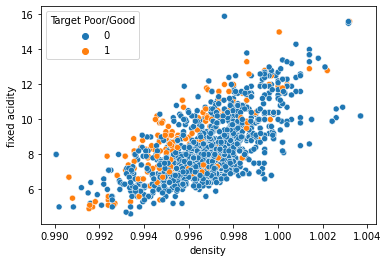

In [546]:
sb.scatterplot(data['density'],data['fixed acidity'],hue=data['Target Poor/Good'])

<AxesSubplot:xlabel='density', ylabel='citric acid'>

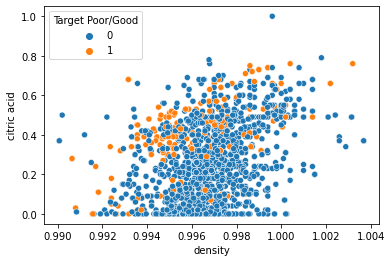

In [547]:
sb.scatterplot(data['density'],data['citric acid'],hue=data['Target Poor/Good'])

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

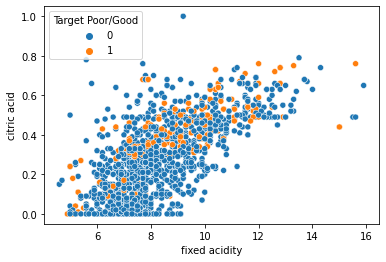

In [548]:
sb.scatterplot(data['fixed acidity'],data['citric acid'],hue=data['Target Poor/Good'])

**To See the Realtionship between features w.r.t to the Target Vaiable**, we can drop residual sugar, PH column

In [549]:

#data.drop('quality',axis=1,inplace=True)

In [550]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target Poor/Good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### STEP 3: DATA CLEANING, OUTLIER TREATMENT, SKEWNESS REMOVAL,  SCALING DATA

    Checking for outliers

In [551]:
from scipy.stats import zscore

In [552]:
new_data = data

In [553]:
scores = np.abs(zscore(new_data))

In [554]:
scores

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.96024611, 0.78782264,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.58477711, 0.78782264,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.58477711, 0.78782264,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54162988, 0.45084835,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.20930812, 0.78782264,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.54162988, 0.45084835,
        0.39625599]])

In [555]:
len(np.where(scores>3)[0]) #11%

192

In [556]:
new_data = new_data[(scores<3).all(axis=1)]

In [557]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target Poor/Good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0



        - After Removal of Outliers, 10% Data loss was encountered
        
        
        - Next, Check for Skewness

In [558]:
new_data.iloc[:,:-1].skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [559]:
y = new_data['Target Poor/Good']
quality = new_data['quality']

In [560]:
new_data.drop(['quality','Target Poor/Good'],axis=1,inplace=True)

    - To Remove Skewness can use Log Transformation, Cuberoot, Sqroot Transform as to makes the features Gaussian Like.
    - USing Power Transformewr also for scaling and removal of skewness

In [561]:
power= PowerTransformer()

In [562]:
features = power.fit_transform(new_data)

In [563]:
transformed_data = pd.DataFrame(features, columns=new_data.columns)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 720x720 with 0 Axes>

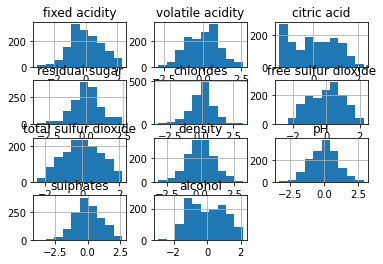

In [564]:
plt.figure(figsize=(10,10))
transformed_data.hist()

In [565]:
transformed_data.skew()

fixed acidity           0.018666
volatile acidity        0.004945
citric acid             0.018049
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                -0.001043
pH                     -0.000074
sulphates               0.020799
alcohol                 0.114658
dtype: float64

### STEP 4: Feature Engineering

In [566]:
from sklearn.decomposition import PCA

In [567]:
pca = PCA()

In [568]:
pca.fit(transformed_data,quality)

PCA()

<BarContainer object of 11 artists>

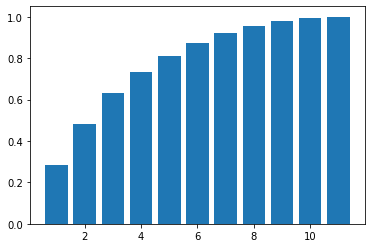

In [569]:
plt.bar(range(1,12),np.cumsum(pca.explained_variance_ratio_))

            WE are getting 95% information with 9 features

        WE can drop 'resdidual sugar', 'pH'

    SKewness removed

#### NOTE:
        Data is ready for modelling, but the Target Classes are imbalanced as Good Wine is 14% of data and 84% is Poor wine,
        WE need to PERFORM OverSAmpling with SMOTE Technique

### STEP 5: DATA MODELLING to Determine the wine Quality as Poor/Good , Binary Classification
    - Removing Ph, Residual Sugar Column as it is not giving any information regarding the Wine Quality

In [570]:
engineered_data = transformed_data.drop(['pH','residual sugar'],axis=1)

In [571]:
from imblearn.over_sampling import SMOTE

In [572]:
smote = SMOTE()

In [573]:
x_over,y_over = smote.fit_resample(engineered_data,y)
x_over1,y_over1 = smote.fit_resample(engineered_data,quality)

In [574]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [575]:
randomstate = 0
max_score = 0
lr = SVC()
for i in range(1,46):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.27,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = accuracy_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100)

Random State= 21  and R2 Score of LR MODEL :  90.37037037037037


In [576]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score

In [577]:
randomstate1 = 0
max_score1 = 0
lr = DecisionTreeRegressor()
for i in range(1,46):
    x_train,x_test,y_train,y_test = train_test_split(x_over1,y_over1,test_size=.27,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)    
    if(score>max_score1):
        max_score1 = score
        randomstate1  = i
print( 'Random State=',randomstate1,' and R2 Score of LR MODEL : ',max_score1*100)

Random State= 3  and R2 Score of LR MODEL :  82.84093873101438


In [578]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.27,random_state=randomstate)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_over1,y_over1,test_size=.27,random_state=randomstate1)

In [579]:
np.mean(cross_val_score(lr,x_over,y_over,cv=5,scoring='accuracy'))

0.86

#### 5.1 Modelling SVC MODel

In [580]:
accuracy_scores = []
cv_scores = []

---------------------SVC MODEL----------------------------
Accuracy Score 0.9792592592592593
Roc_Auc_Score 0.9987094621881201
Training Score with Cross Validation 0.9612


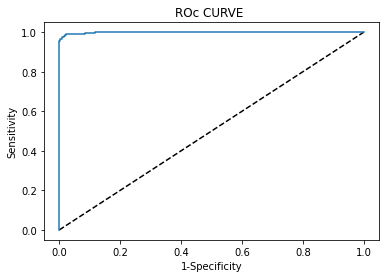

In [581]:
svc = SVC(probability=True,kernel='rbf',C=10,gamma=1)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
pred_proba_svc = svc.predict_proba(x_test)[:,1]
score = accuracy_score(y_test,pred_svc)
fpr,tpr,threshold=roc_curve(y_test,pred_proba_svc)
print('---------------------SVC MODEL----------------------------')
print('Accuracy Score',score)
print('Roc_Auc_Score',roc_auc_score(y_test,pred_proba_svc))
cv_score = np.mean(cross_val_score(svc,x_over,y_over,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROc CURVE ')
accuracy_scores.append(score )
cv_scores.append(cv_score)

-------------SVC MODEL---------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       338
           1       0.97      0.99      0.98       337

    accuracy                           0.98       675
   macro avg       0.98      0.98      0.98       675
weighted avg       0.98      0.98      0.98       675



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

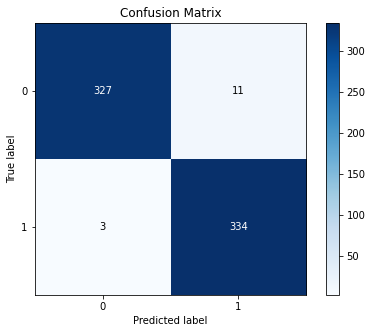

In [582]:
print('-------------SVC MODEL---------------')
print(classification_report(y_test,pred_svc))

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(  y_test,  pred_svc,figsize=(7,5))

In [583]:
params = {'kernel': ['linear','rbf','sigmoid'],
         'C':[1,10],
         'gamma':[1,10,.1]
         }
grid = GridSearchCV(svc,params,cv=5,scoring='accuracy')

In [584]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=10, gamma=1, probability=True),
             param_grid={'C': [1, 10], 'gamma': [1, 10, 0.1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [585]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

### 5.2 DecisionTREE

In [586]:
params = {'criterion': ['ginni','entropy'],
          'max_depth' : [2,4,6,8,10,12],
          'max_leaf_nodes' : [1, 5, 10, 20, 50, 100]
         
         }
grid = GridSearchCV(dtc,params,cv=5,scoring='accuracy')

In [587]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=12,
                                              max_leaf_nodes=100),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [1, 5, 10, 20, 50, 100]},
             scoring='accuracy')

In [588]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'max_leaf_nodes': 100}

---------------------Decsion Tree MODEL----------------------------
Accuracy Score 0.8888888888888888
Roc_Auc_Score 0.9192755429915895
Training Score with Cross Validation 0.8619999999999999


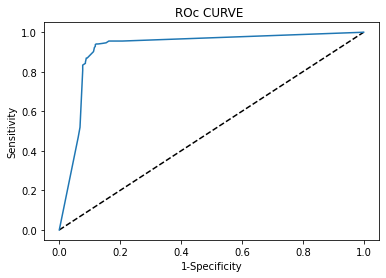

In [589]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=12,max_leaf_nodes=100)
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)
pred_proba_dtc = dtc.predict_proba(x_test)[:,1]
score = accuracy_score(y_test,pred_dtc)
fpr,tpr,threshold=roc_curve(y_test,pred_proba_dtc)
print('---------------------Decsion Tree MODEL----------------------------')
print('Accuracy Score',score)
print('Roc_Auc_Score',roc_auc_score(y_test,pred_proba_dtc))
cv_score = np.mean(cross_val_score(dtc,x_over,y_over,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROc CURVE ')
accuracy_scores.append(score )
cv_scores.append(cv_score)

-------------Decision Tree MODEL---------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       338
           1       0.90      0.87      0.89       337

    accuracy                           0.89       675
   macro avg       0.89      0.89      0.89       675
weighted avg       0.89      0.89      0.89       675



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

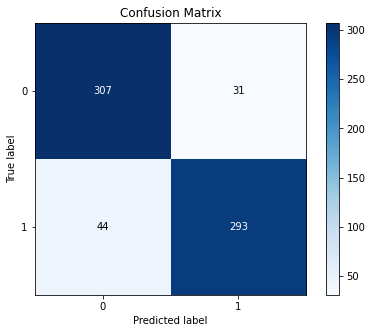

In [590]:
print('-------------Decision Tree MODEL---------------')
print(classification_report(y_test,pred_dtc))
skplt.metrics.plot_confusion_matrix(  y_test,  pred_dtc,figsize=(7,5))

### 5.3 KNN

In [591]:
#Selecting Value of K
acc_knn = []
error=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_knn = knn.predict(x_test)
    acc_knn.append(accuracy_score(y_test,pred_knn))
    error.append(np.mean(pred_knn!= y_test))

Text(0, 0.5, 'Error RAte')

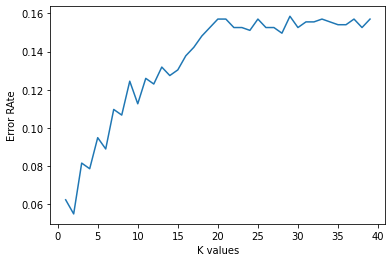

In [592]:
plt.plot(range(1,40),error)
plt.xlabel('K values')
plt.ylabel('Error RAte')

    For k Value of 2, knn gives highest accuracy but minght go through underfitting with a low value of K

--------------------KNN MODEL----------------------------
Accuracy Score 0.9451851851851852
Roc_Auc_Score 0.9463241620283391
Training Score with Cross Validation 0.9024000000000001


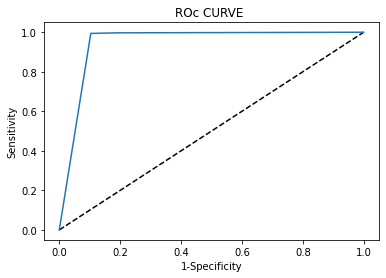

In [593]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_proba_knn = knn.predict_proba(x_test)[:,1]
score = accuracy_score(y_test,pred_knn)
fpr,tpr,threshold=roc_curve(y_test,pred_proba_knn)
print('--------------------KNN MODEL----------------------------')
print('Accuracy Score',score)
print('Roc_Auc_Score',roc_auc_score(y_test,pred_proba_knn))
cv_score = np.mean(cross_val_score(knn,x_over,y_over,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROc CURVE ')
accuracy_scores.append(score )
cv_scores.append(cv_score)

------------KNN MODEL---------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       338
           1       0.91      0.99      0.95       337

    accuracy                           0.95       675
   macro avg       0.95      0.95      0.95       675
weighted avg       0.95      0.95      0.95       675



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

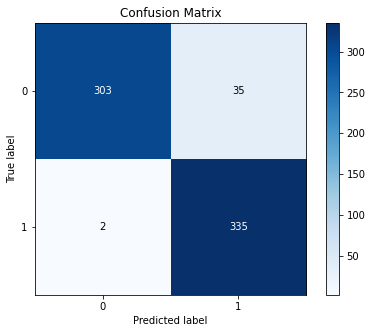

In [594]:
print('------------KNN MODEL---------------')
print(classification_report(y_test,pred_knn))
skplt.metrics.plot_confusion_matrix(  y_test,  pred_knn,figsize=(7,5))

### 5.4 Random Forest Classifer

In [595]:
rf = RandomForestClassifier()
params = {'n_estimators': [50,100,60,70,110,130,150,200],
        'max_depth' : [2,4,6,8,10,12],
          'max_leaf_nodes' : [1, 5, 10, 20, 50, 100]
         }
grid = GridSearchCV(rf,params,cv=5,scoring='accuracy')

In [596]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [1, 5, 10, 20, 50, 100],
                         'n_estimators': [50, 100, 60, 70, 110, 130, 150, 200]},
             scoring='accuracy')

In [597]:
grid.best_params_

{'max_depth': 12, 'max_leaf_nodes': 100, 'n_estimators': 130}

--------------------RANDOM Forest  MODEL----------------------------
Accuracy Score 0.9555555555555556
Roc_Auc_Score 0.9919846188962829
Training Score with Cross Validation 0.9040000000000001


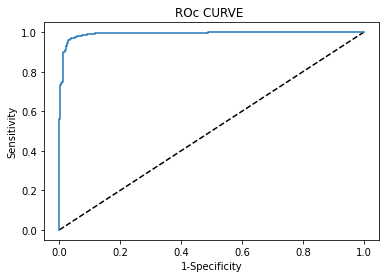

In [598]:
rf = RandomForestClassifier(n_estimators=110, max_leaf_nodes=100,max_depth=12)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
pred_proba_rf = rf.predict_proba(x_test)[:,1]
score = accuracy_score(y_test,pred_rf)
fpr,tpr,threshold=roc_curve(y_test,pred_proba_rf)
print('--------------------RANDOM Forest  MODEL----------------------------')
print('Accuracy Score',score)
print('Roc_Auc_Score',roc_auc_score(y_test,pred_proba_rf))
cv_score = np.mean(cross_val_score(rf,x_over,y_over,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROc CURVE ')
accuracy_scores.append(score )
cv_scores.append(cv_score)  

------------Random Forest MODEL---------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       338
           1       0.93      0.98      0.96       337

    accuracy                           0.96       675
   macro avg       0.96      0.96      0.96       675
weighted avg       0.96      0.96      0.96       675



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

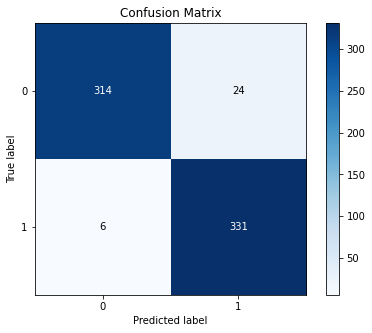

In [599]:
print('------------Random Forest MODEL---------------')
print(classification_report(y_test,pred_rf))
skplt.metrics.plot_confusion_matrix(  y_test,  pred_rf,figsize=(7,5))

### 5.5 GraidentBoosting Classifer

--------------------Gradient Boosting MODEL----------------------------
Accuracy Score 0.9466666666666667
Roc_Auc_Score 0.9809316453918144
Training Score with Cross Validation 0.882


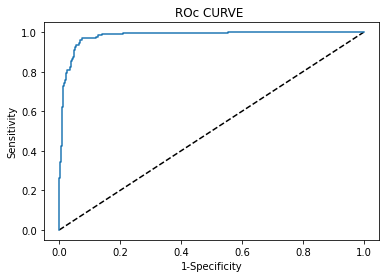

In [600]:
abb = GradientBoostingClassifier(n_estimators=110)
abb.fit(x_train,y_train)
pred_abb = abb.predict(x_test)
pred_proba_abb = abb.predict_proba(x_test)[:,1]
score = accuracy_score(y_test,pred_abb)
fpr,tpr,threshold=roc_curve(y_test,pred_proba_abb)
print('--------------------Gradient Boosting MODEL----------------------------')
print('Accuracy Score',score)
print('Roc_Auc_Score',roc_auc_score(y_test,pred_proba_abb))
cv_score = np.mean(cross_val_score(abb,x_over,y_over,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROc CURVE ')
accuracy_scores.append(score )
cv_scores.append(cv_score)  

------------Gradient Boosting MODEL---------------
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       338
           1       0.93      0.97      0.95       337

    accuracy                           0.95       675
   macro avg       0.95      0.95      0.95       675
weighted avg       0.95      0.95      0.95       675



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

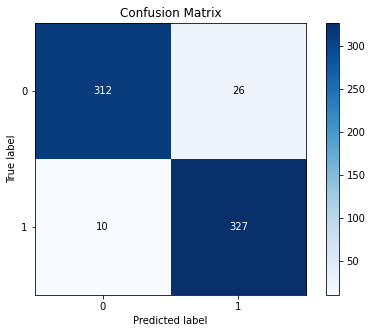

In [601]:
print('------------Gradient Boosting MODEL---------------')
print(classification_report(y_test,pred_abb))
skplt.metrics.plot_confusion_matrix(  y_test,  pred_abb,figsize=(7,5))

### 5.6 Logistic Regression

--------------------Logistic MODEL----------------------------
Accuracy Score 0.8607407407407407
Roc_Auc_Score 0.9290028620090249
Training Score with Cross Validation 0.7984


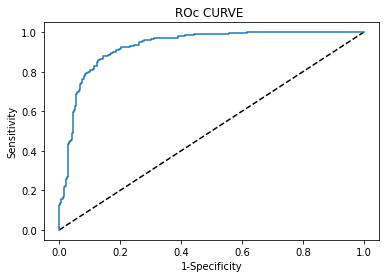

In [602]:
abb = LogisticRegression()
abb.fit(x_train,y_train)
pred_abb = abb.predict(x_test)
pred_proba_abb = abb.predict_proba(x_test)[:,1]
score = accuracy_score(y_test,pred_abb)
fpr,tpr,threshold=roc_curve(y_test,pred_proba_abb)
print('--------------------Logistic MODEL----------------------------')
print('Accuracy Score',score)
print('Roc_Auc_Score',roc_auc_score(y_test,pred_proba_abb))
cv_score = np.mean(cross_val_score(abb,x_over,y_over,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROc CURVE ')
accuracy_scores.append(score )
cv_scores.append(cv_score)  

------------Gradient Boosting MODEL---------------
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       338
           1       0.85      0.88      0.86       337

    accuracy                           0.86       675
   macro avg       0.86      0.86      0.86       675
weighted avg       0.86      0.86      0.86       675



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

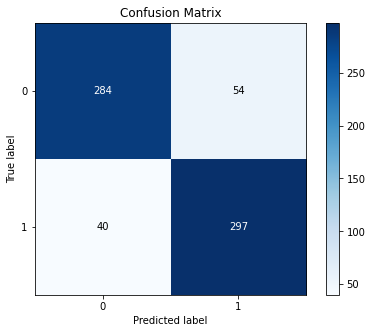

In [603]:
print('------------Gradient Boosting MODEL---------------')
print(classification_report(y_test,pred_abb))
skplt.metrics.plot_confusion_matrix(  y_test,  pred_abb,figsize=(7,5))

In [604]:
error = []
for i in range(0,6):
    error.append(accuracy_scores[i] - cv_scores[i])
    

In [605]:
tab = {
    'Accracy Score': accuracy_scores, 'CV Score': cv_scores, 'Error Difference': error
}

In [606]:
table = pd.DataFrame(tab,index=['SVC','DTC','KNN','RF','GBC','logReg'])

In [607]:
table

,Accracy Score,CV Score,Error Difference
SVC,0.979259,0.9612,0.018059
DTC,0.888889,0.8620,0.026889
KNN,0.945185,0.9024,0.042785
RF,0.955556,0.9040,0.051556
GBC,0.946667,0.8820,0.064667
logReg,0.860741,0.7984,0.062341


##### Observation
        - WE need to choose a model with least error and High Accuracy
        - Least error is with Logistic Regression, SVC but SVC has highest Accuracy.
        - Model Chosen is SVC

### STEP 6: EVALUATE THE CHOSEN MODEL : SVC MODEL 

---------------------SVC MODEL----------------------------
Accuracy Score 0.9037037037037037
Roc_Auc_Score 0.9657612417256335
Training Score with Cross Validation 0.8523999999999999


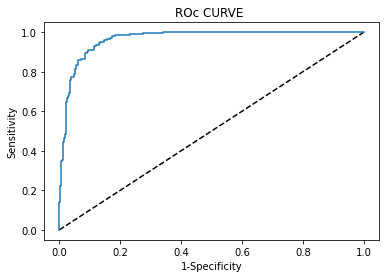

In [608]:
svc = SVC(probability=True)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
pred_proba_svc = svc.predict_proba(x_test)[:,1]
score = accuracy_score(y_test,pred_svc)
fpr,tpr,threshold=roc_curve(y_test,pred_proba_svc)
print('---------------------SVC MODEL----------------------------')
print('Accuracy Score',score)
print('Roc_Auc_Score',roc_auc_score(y_test,pred_proba_svc))
cv_score = np.mean(cross_val_score(svc,x_over,y_over,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROc CURVE ')
accuracy_scores.append(score )
cv_scores.append(cv_score)

-------------SVC MODEL---------------
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       338
           1       0.88      0.94      0.91       337

    accuracy                           0.90       675
   macro avg       0.91      0.90      0.90       675
weighted avg       0.91      0.90      0.90       675



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

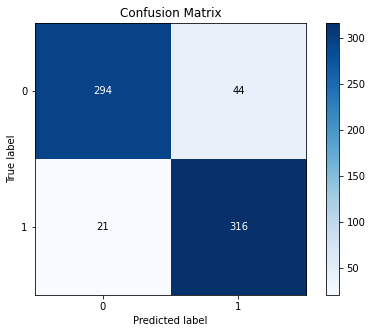

In [609]:
print('-------------SVC MODEL---------------')
print(classification_report(y_test,pred_svc))

skplt.metrics.plot_confusion_matrix(  y_test,  pred_svc,figsize=(7,5))

### TUNING THE HYPER PARAMETER WITH GRIDSEARCHCV

In [610]:
params = {'kernel': ['linear','rbf','sigmoid'],
         'C':[1,10],
         'gamma':[1,10,.1]
         }
grid = GridSearchCV(svc,params,cv=5,scoring='accuracy')

In [611]:
grid.fit(x_over,y_over)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10], 'gamma': [1, 10, 0.1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [612]:
grid.best_params_ 


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

---------------------SVC MODEL----------------------------
Accuracy Score 0.9792592592592593
Roc_Auc_Score 0.9985602163187189
Training Score with Cross Validation 0.9624


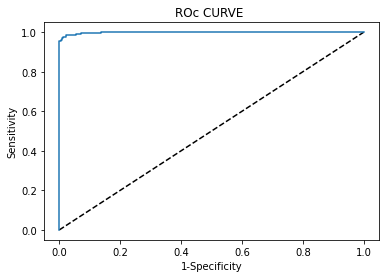

In [620]:
svc = SVC(probability=True,gamma=1,C=1,kernel='rbf')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
pred_proba_svc = svc.predict_proba(x_test)[:,1]
score = accuracy_score(y_test,pred_svc)
fpr,tpr,threshold=roc_curve(y_test,pred_proba_svc)
print('---------------------SVC MODEL----------------------------')
print('Accuracy Score',score)
print('Roc_Auc_Score',roc_auc_score(y_test,pred_proba_svc))
cv_score = np.mean(cross_val_score(svc,x_over,y_over,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROc CURVE ')
accuracy_scores.append(score )
cv_scores.append(cv_score)

-------------SVC MODEL---------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       338
           1       0.97      0.99      0.98       337

    accuracy                           0.98       675
   macro avg       0.98      0.98      0.98       675
weighted avg       0.98      0.98      0.98       675



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

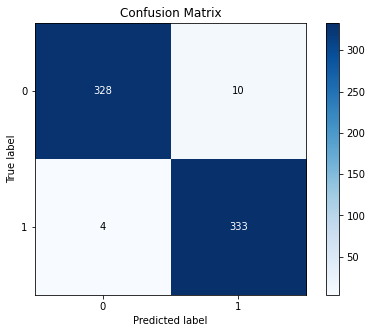

In [621]:
print('-------------SVC MODEL---------------')
print(classification_report(y_test,pred_svc))

skplt.metrics.plot_confusion_matrix(  y_test,  pred_svc,figsize=(7,5))

**NOTE**
    - After Hypertuning the SVC Model, the Model accuracy increased and it giving its best results with 98% accuracy for predicting the quality of wine.

### Modeling Random Forest MOdel  For predicting the Quality from Range 1-10

In [615]:
rf = RandomForestClassifier()
params = {'n_estimators': [50,100,60,70,110,130,150,200],
        'max_depth' : [2,4,6,8,10,12],
          'max_leaf_nodes' : [1, 5, 10, 20, 50, 100]
         }
grid = GridSearchCV(rf,params,cv=5,scoring='accuracy')

In [616]:
grid.fit(x_over1,y_over1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [1, 5, 10, 20, 50, 100],
                         'n_estimators': [50, 100, 60, 70, 110, 130, 150, 200]},
             scoring='accuracy')

In [617]:
grid.best_params_

{'max_depth': 12, 'max_leaf_nodes': 100, 'n_estimators': 60}

In [618]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train1,y_train1)
pred_rf = rf.predict(x_test1)

score = accuracy_score(y_test1,pred_rf)

print('--------------------RANDOM Forest  MODEL----------------------------')
print('Accuracy Score',score)
#print('Roc_Auc_Score',roc_auc_score(y_test1,pred_proba_rf))
cv_score = np.mean(cross_val_score(rf,x_over1,y_over1,cv=5,scoring='accuracy'))
print('Training Score with Cross Validation',cv_score)



--------------------RANDOM Forest  MODEL----------------------------
Accuracy Score 0.8763505402160864
Training Score with Cross Validation 0.7844408427876823


-------------Random Forest MODEL---------------
              precision    recall  f1-score   support

           4       0.91      0.95      0.93       188
           5       0.80      0.75      0.77       154
           6       0.75      0.68      0.71       148
           7       0.88      0.96      0.92       161
           8       0.98      0.99      0.99       182

    accuracy                           0.88       833
   macro avg       0.87      0.87      0.86       833
weighted avg       0.87      0.88      0.87       833



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

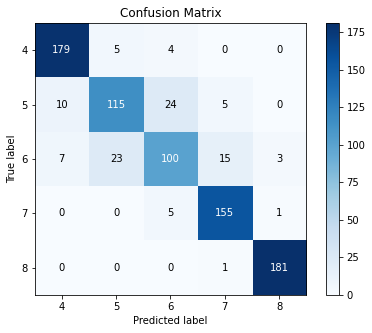

In [619]:
print('-------------Random Forest MODEL---------------')
print(classification_report(y_test1,pred_rf))

skplt.metrics.plot_confusion_matrix(  y_test1,  pred_rf,figsize=(7,5))

## CONCLUSION
        
        - After Feature engineering and Visualization of feature with the Qaulity of Wine, 
        - I have Come to the Conclusion that features like High content of Alcohol, Sulphate, Citric Acid makes a wine good and other features liek volatile acidity, fixed acidity, sulpher dioxide content, providing a lilte information for a good quality wine.
       - While Ph, Density, Residual Sugar tells us least or doesnto help in distincting between good and poor quality wine.
       - ALso, Moderate quality Wine(Neither Good or Bad) have high Sulhate dioxide content.
        
        - With SVM MODEL, it can predict the quality of wine whether Good or bad with 98% accuracy.
        - With Random Forest model , yuo can predict the Qualitty Score (1-10) for a given wine with 85% Accuracy

#### THANKYOU